# Chap 17 - Ex2: Apply LLE for bill_authentication data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)
pd.set_option('display.width', 1000)

In [2]:
bill = pd.read_csv('Data/bill_authentication.csv')

bill

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Number of numerical fields: 4

All numerical fields: Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')



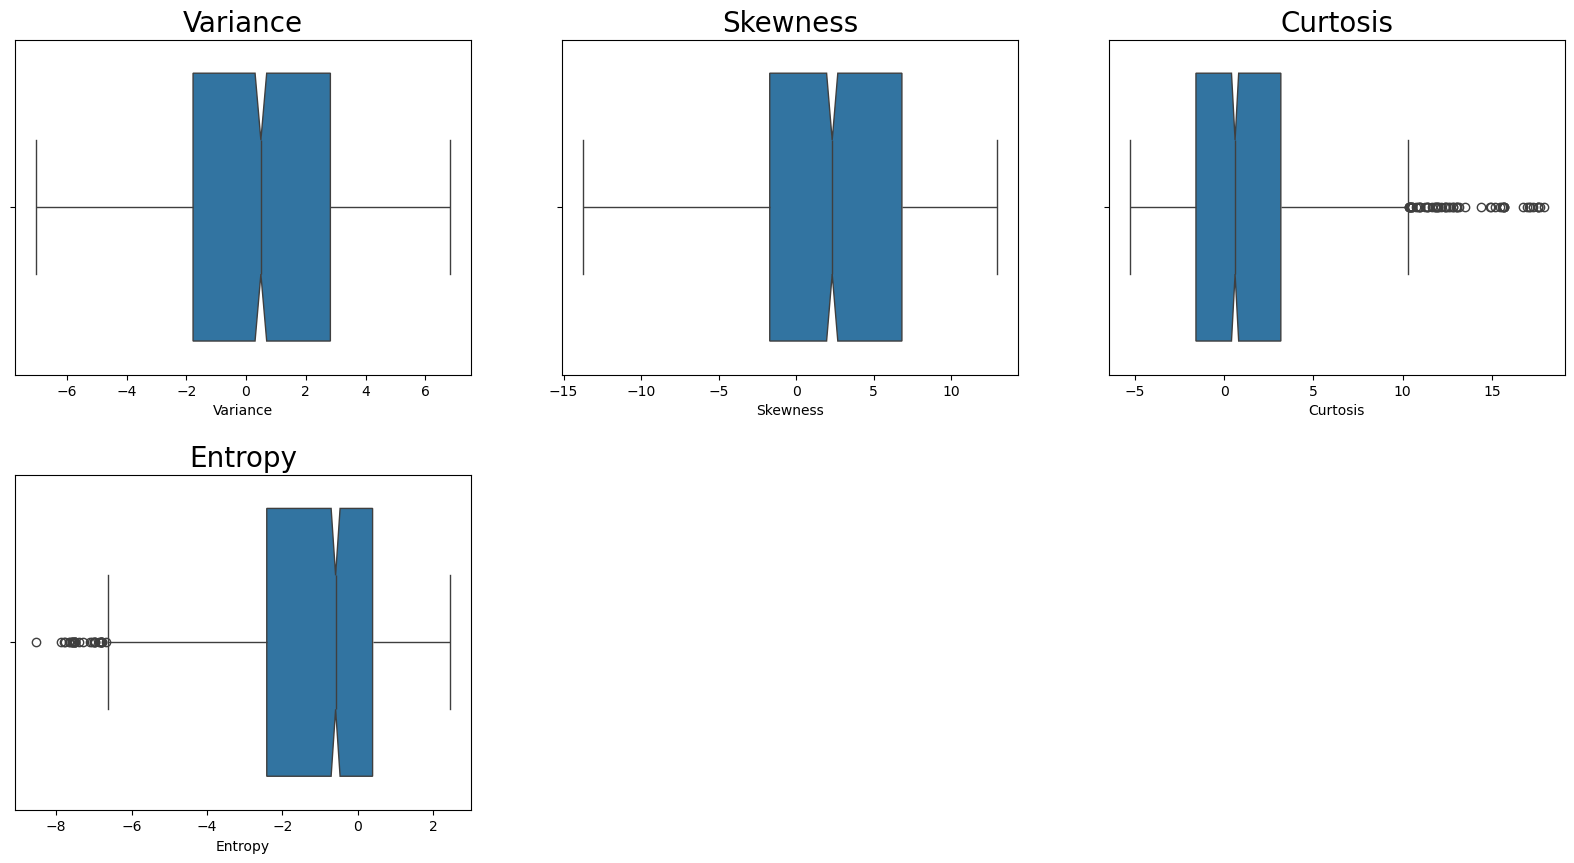

In [8]:
## Visualize numerical variables

numeric_cols = bill.columns[:-1]

col = 3
row = (len(numeric_cols)//col) if ( (len(numeric_cols)%col) == 0) else ((len(numeric_cols)//col) + 1)

print(f'Number of numerical fields: {len(numeric_cols)}\n')
print(f'All numerical fields: {numeric_cols}\n')

plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
for i in range(1, len(numeric_cols)+1):
    try:
        plt.subplot(row, col, i)
        sbn.boxplot(data = bill, x = numeric_cols[i-1], notch = True)
        plt.title(numeric_cols[i-1], size = 20)
    except Exception:
        print('Error {}'.format(numeric_cols[i-1]))
        break
plt.show()

## <span style = 'color:yellow'> Outliers are not too extreme, can use MinMaxScaler
## <span style = 'color:yellow'> Run many times with different n_neighbors

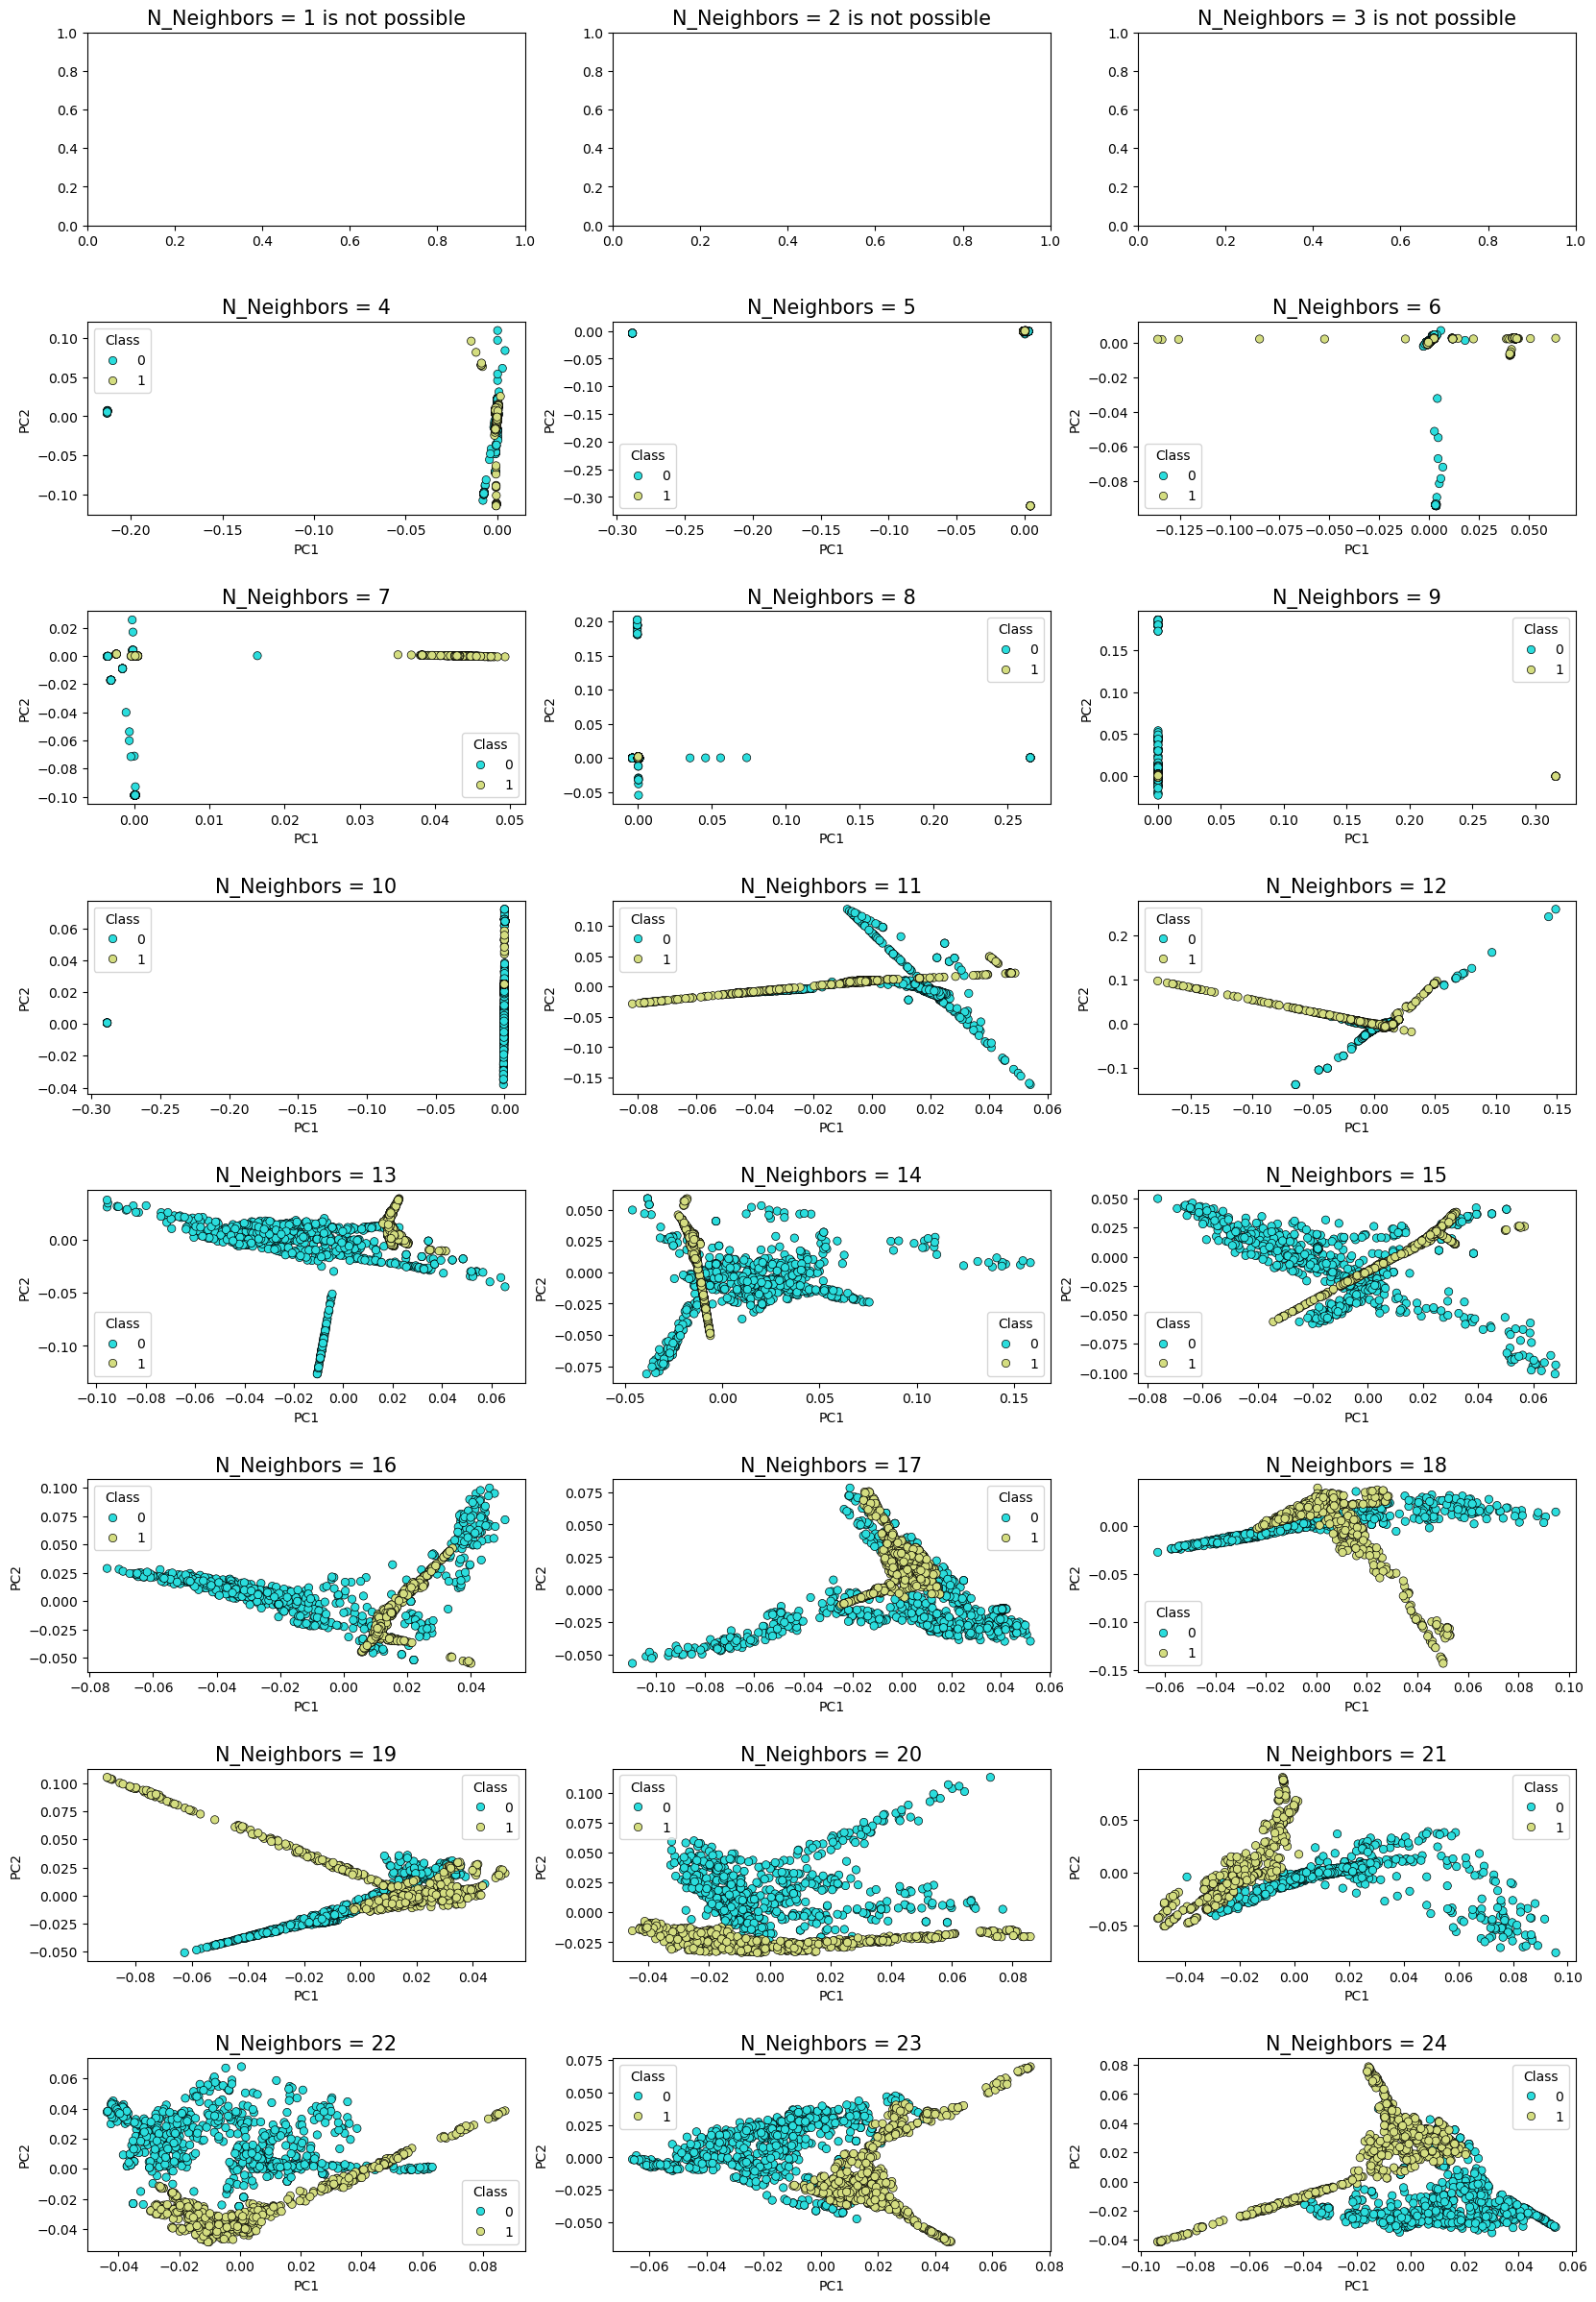

In [47]:
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.manifold import LocallyLinearEmbedding
from imblearn.pipeline import Pipeline

neighbor_lst = list(range(1, 25))
col = 3
row = (len(neighbor_lst)//col) if ( (len(neighbor_lst)%col) == 0) else ((len(neighbor_lst)//col) + 1)

plt.figure(figsize=(20,30))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for neighbor in neighbor_lst:
    lle_pipe = Pipeline([
        ('MinMaxScaler', MinMaxScaler()),
        ('LLE', LocallyLinearEmbedding(n_neighbors=neighbor, n_components=2, random_state=1)) #n_components=3 means the transformed data will be 3-D
    ])

    try:
        lle_pipe.fit(bill.drop('Class', axis = 1))
    except Exception:
        plt.subplot(row, col, neighbor)
        plt.title(f'N_Neighbors = {neighbor} is not possible', size = 15)
        continue
    
    #Create LLE reduced dataframe
    bill_lle = pd.DataFrame(
        lle_pipe.transform(bill.drop('Class', axis = 1)),
        columns = [f'PC{i+1}' for i in range(lle_pipe.named_steps['LLE'].n_components)]
    )    

    plt.subplot(row, col, neighbor)
    sbn.scatterplot(data = bill_lle, x = 'PC1', y = 'PC2', edgecolors = 'black', hue = bill['Class'], palette = 'rainbow')
    plt.title(f'N_Neighbors = {neighbor}', size = 15)

plt.show()

## <span style = 'color:yellow'> Build offcial LLE model

           PC1       PC2
0    -0.022158  0.014296
1    -0.003752 -0.014658
2     0.037261  0.077858
3    -0.013067  0.001857
4     0.004032  0.013634
...        ...       ...
1367  0.003523 -0.023937
1368 -0.032384 -0.030806
1369 -0.029322 -0.013665
1370 -0.040413 -0.012692
1371 -0.014189 -0.024594

[1372 rows x 2 columns]


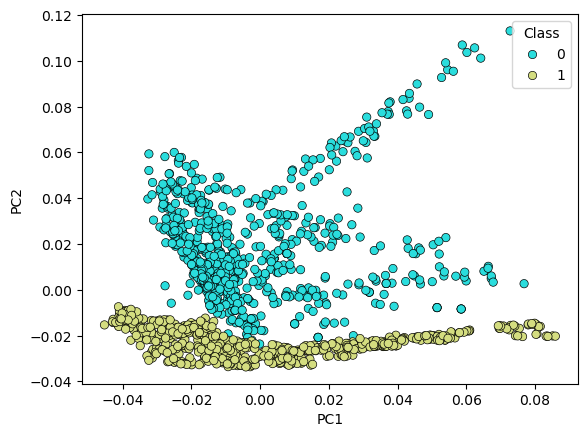

In [36]:
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.manifold import LocallyLinearEmbedding
from imblearn.pipeline import Pipeline


#Build LLE pipeline with scaling steps
lle_pipe = Pipeline([
    ('MinMaxScaler', MinMaxScaler()),
    ('LLE', LocallyLinearEmbedding(n_neighbors=20, n_components=2, random_state=1)) #n_components=3 means the transformed data will be 3-D
])

lle_pipe.fit(bill.drop('Class', axis = 1))


#Create LLE reduced dataframe
bill_lle = pd.DataFrame(
    lle_pipe.transform(bill.drop('Class', axis = 1)),
    columns = [f'PC{i+1}' for i in range(lle_pipe.named_steps['LLE'].n_components)]
)

print(bill_lle)


#2D visualize
sbn.scatterplot(data = bill_lle, x = 'PC1', y = 'PC2', edgecolors = 'black', hue = bill['Class'], palette = 'rainbow')
plt.show()